# Potiential Probability of the sales enquiry

Problem Statement:-
    
An online education institute sells courses to industry professionals.

The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a
form providing their contact information and other details.
Once these forms are acquired, sales marketing  team start making calls,
writing emails, etc. Through this process, some of the leads get converted while most do not.
its lead conversion rate is very poor say 30 percent.

If they successfully identify this set of enquiries, the sales conversion rate should go up as
the sales team will now be focusing more on communicating with the potential clients rather
than making calls to everyone.

Goal :- find the potential Probability of the sales enquiries.
assign a score between 0 and 100 to target potential leads.

A higher score would mean that the lead is hot, i.e. is most likely to convert
whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('Targeting_right_customer.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Preprocessing

In [4]:
# Checking the missing value :
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# Dropping the columns not required :-
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
                   'Asymmetrique Profile Index'], axis = 1)

In [10]:
data.shape

(9240, 33)

In [12]:
data = data.drop(['Prospect ID','Lead Number'], axis = 1)
data.shape

(9240, 31)

In [15]:
# Printing the unique values in the object columns:
for i in data.select_dtypes("O").columns:
    print(i)
    print(data[i].unique())

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Country
[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia

In [16]:
data = data.replace('Select',np.nan)

In [17]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

# EDA 

In [18]:
data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [19]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [22]:
data['Lead Quality'].value_counts().values

array([1560, 1092,  637,  601,  583], dtype=int64)

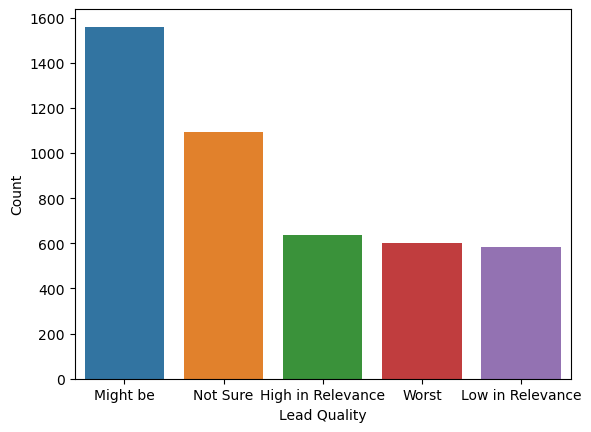

In [24]:
sns.barplot(x=data['Lead Quality'].value_counts().index,y=data['Lead Quality'].value_counts().values)
plt.xlabel('Lead Quality')
plt.ylabel('Count')
plt.show()

In [25]:
# Filling the missing value with 'Not Sure'
data['Lead Quality'] = data['Lead Quality'].fillna('Not Sure')

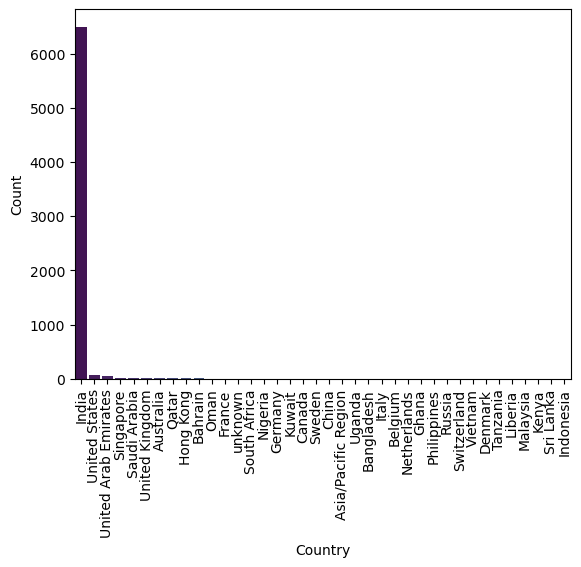

In [29]:
# Country
sns.barplot(x=data['Country'].value_counts().index,y=data['Country'].value_counts().values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Filling the missing value with India
data['Country'] = data['Country'].fillna('India')

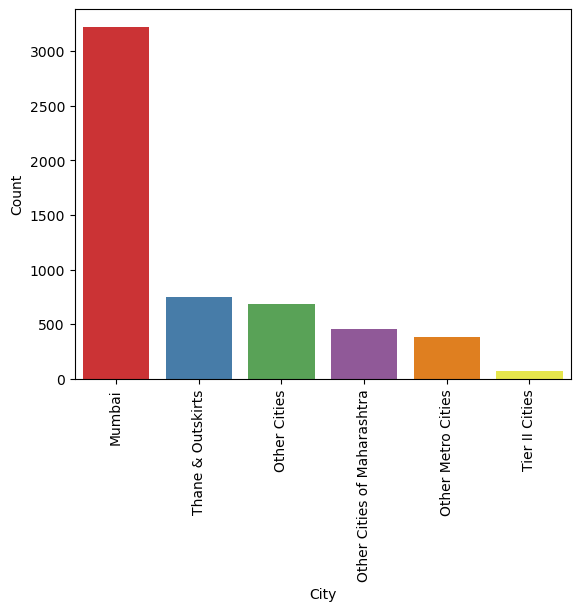

In [31]:
# City
sns.barplot(x=data['City'].value_counts().index,y=data['City'].value_counts().values, palette='Set1')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Filling the missing value with Mumbai
data['City'] = data['City'].fillna('Mumbai')

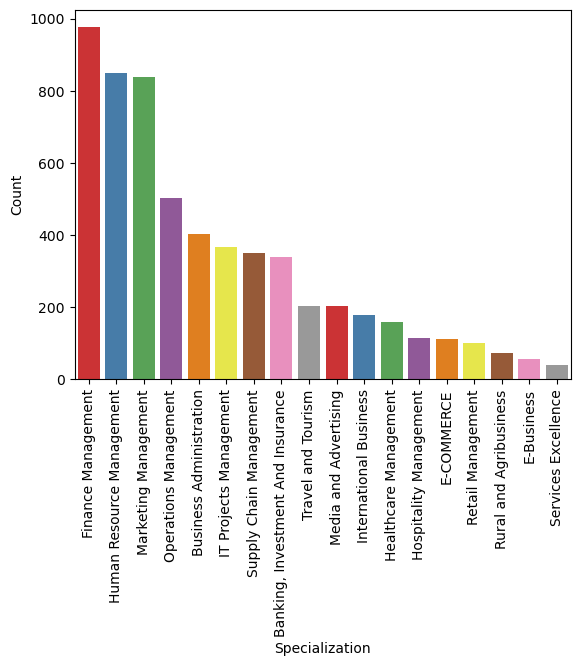

In [36]:
# Specialization
sns.barplot(x=data['Specialization'].value_counts().index,y=data['Specialization'].value_counts().values, palette='Set1')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Filling the missing value with 'Others'
data['Specialization'] = data['Specialization'].fillna('Others')

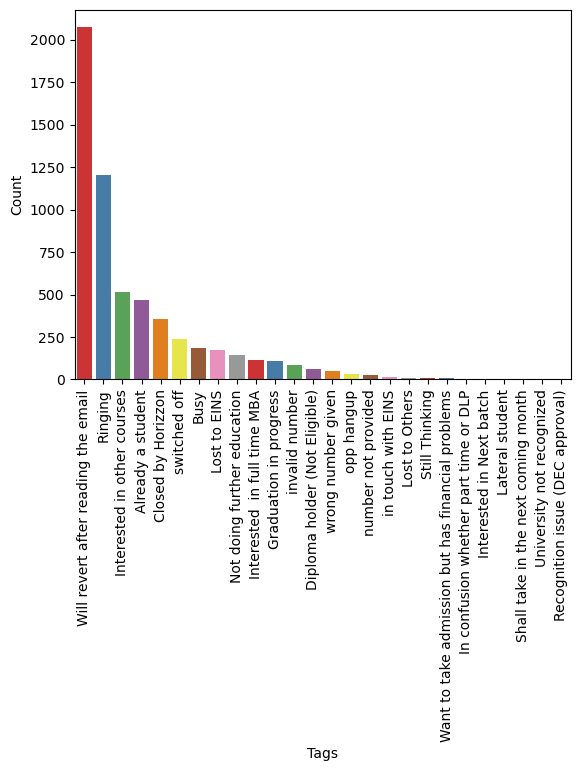

In [38]:
# Tags
sns.barplot(x=data['Tags'].value_counts().index,y=data['Tags'].value_counts().values, palette='Set1')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [39]:
# Filling the missing values with 'No Comment'
data['Tags'] = data['Tags'].fillna('No Comments')

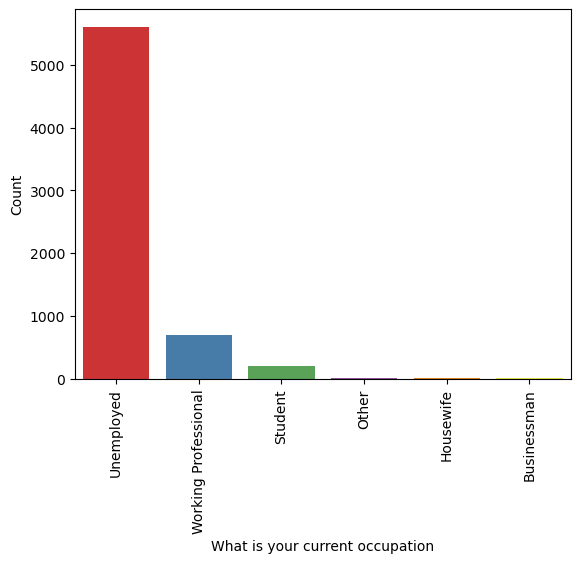

In [40]:
# What is your current occupation
sns.barplot(x=data['What is your current occupation'].value_counts().index,
            y=data['What is your current occupation'].value_counts().values, palette='Set1')
plt.xlabel('What is your current occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [41]:
data['What is your current occupation'] = data['What is your current occupation'].fillna('Other')

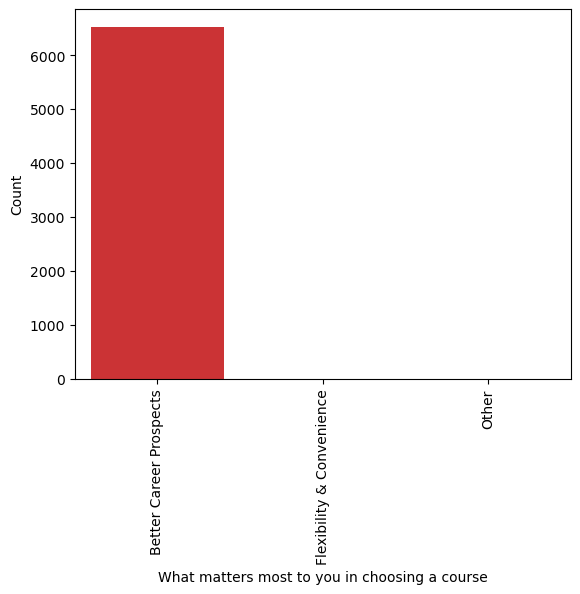

In [42]:
# What matters most to you in choosing a course
sns.barplot(x=data['What matters most to you in choosing a course'].value_counts().index,
            y=data['What matters most to you in choosing a course'].value_counts().values, palette='Set1')
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [43]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('Other')

In [45]:
data.isnull().sum().sort_values(ascending=False)/len(data)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Origin                                      0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Lead Quality                                     0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Newspaper                                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
Digital Advert

In [46]:
# Removing the columns withs high missing values
data = data.drop(['How did you hear about X Education','Lead Profile'], axis = 1)

In [47]:
data.shape

(9240, 29)

In [48]:
# Removing the rows having missing values:
data = data.dropna()
data.isnull().sum().sum()

0

In [49]:
data.shape

(9074, 29)

In [50]:
# Taking the count of Converted :
data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

# Analysis of data w.r.t 'Converted'

In [51]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

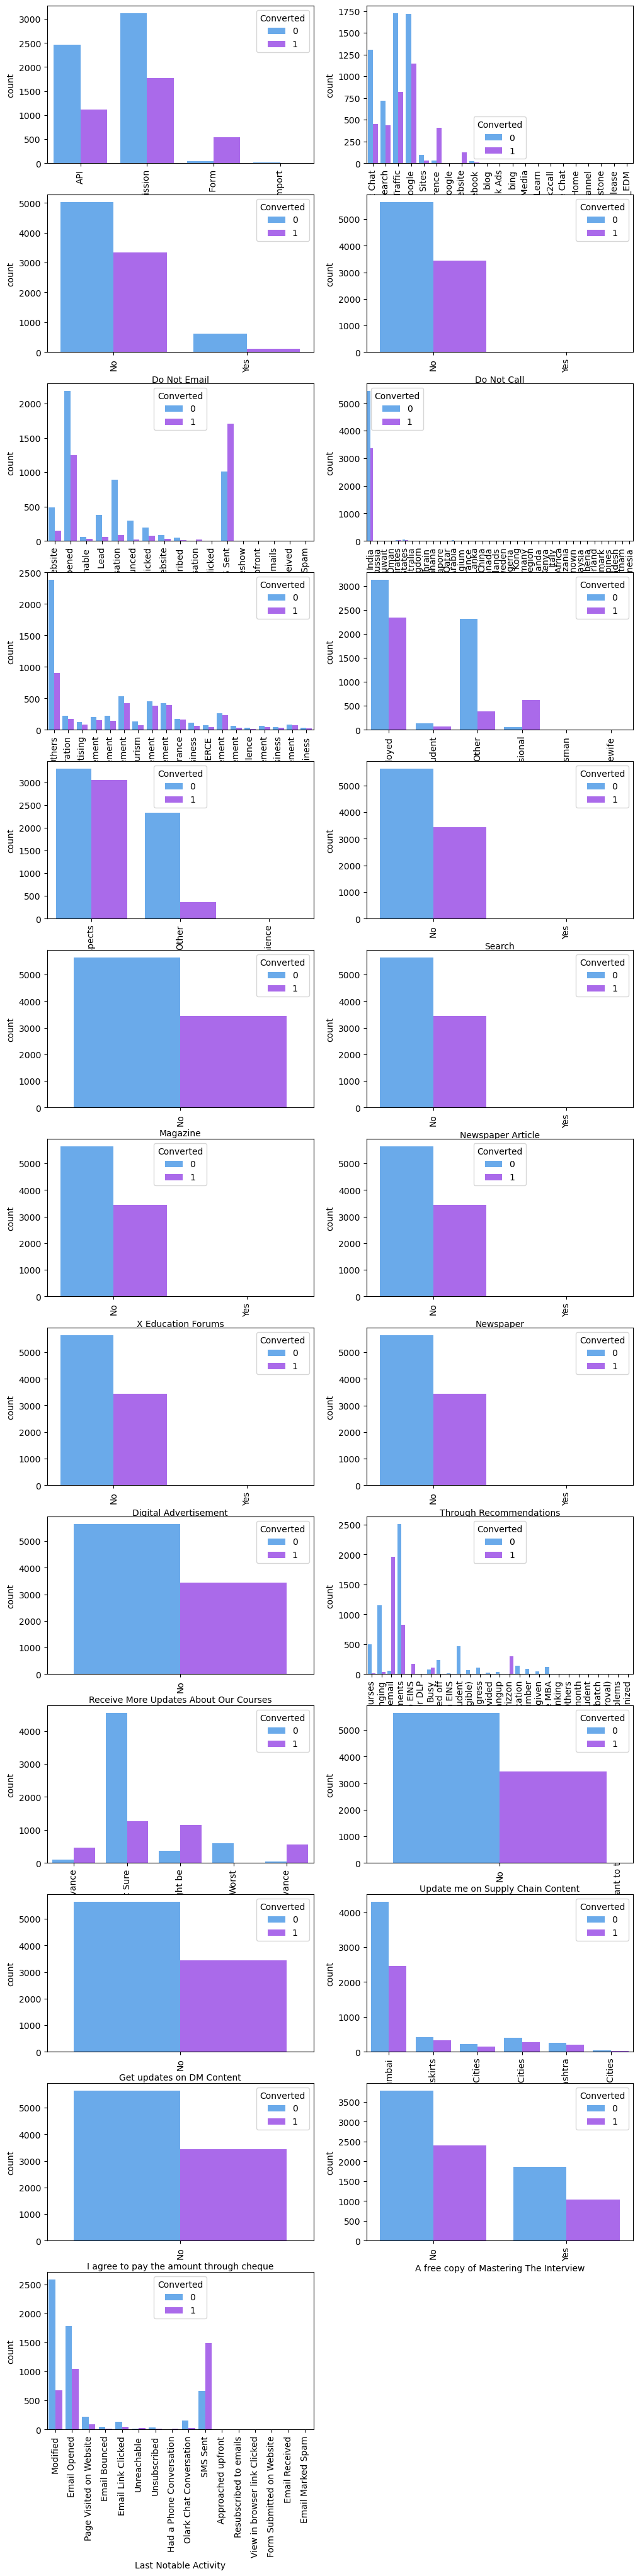

In [65]:
plt.figure(figsize=(12,50))
plot = 1
for i in data.select_dtypes('O').columns:
    plt.subplot(13,2,plot)
    sns.countplot(x = i,hue = 'Converted', data = data, palette='cool')
    plt.xticks(rotation=90)
    plot+=1
plt.show()

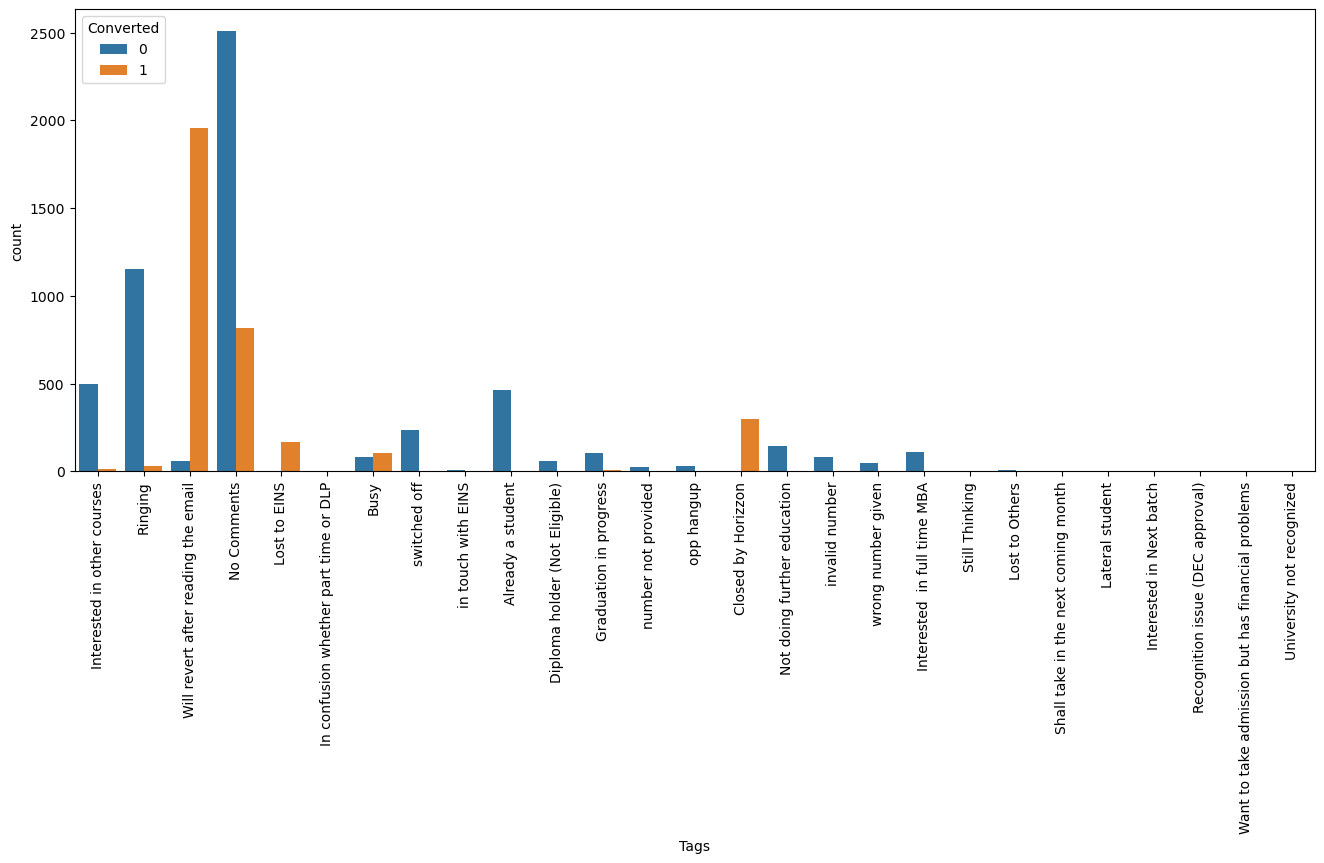

In [66]:
plt.figure(figsize=(16,6))
sns.countplot(x="Tags",data=data,hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [67]:
data['Tags'] = data['Tags'].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given",
                                       "opp hangup","number not provided","in touch with EINS","Lost to Others",
                                       "Still Thinking","Want to take admission but has financial problems",
                                       "In confusion whether part time or DLP","Interested in Next batch",
                                       "Lateral student","Shall take in the next coming month",
                                       "University not recognized","Recognition issue (DEC approval)",
                                       "Graduation in progress"],'Other_Comment')

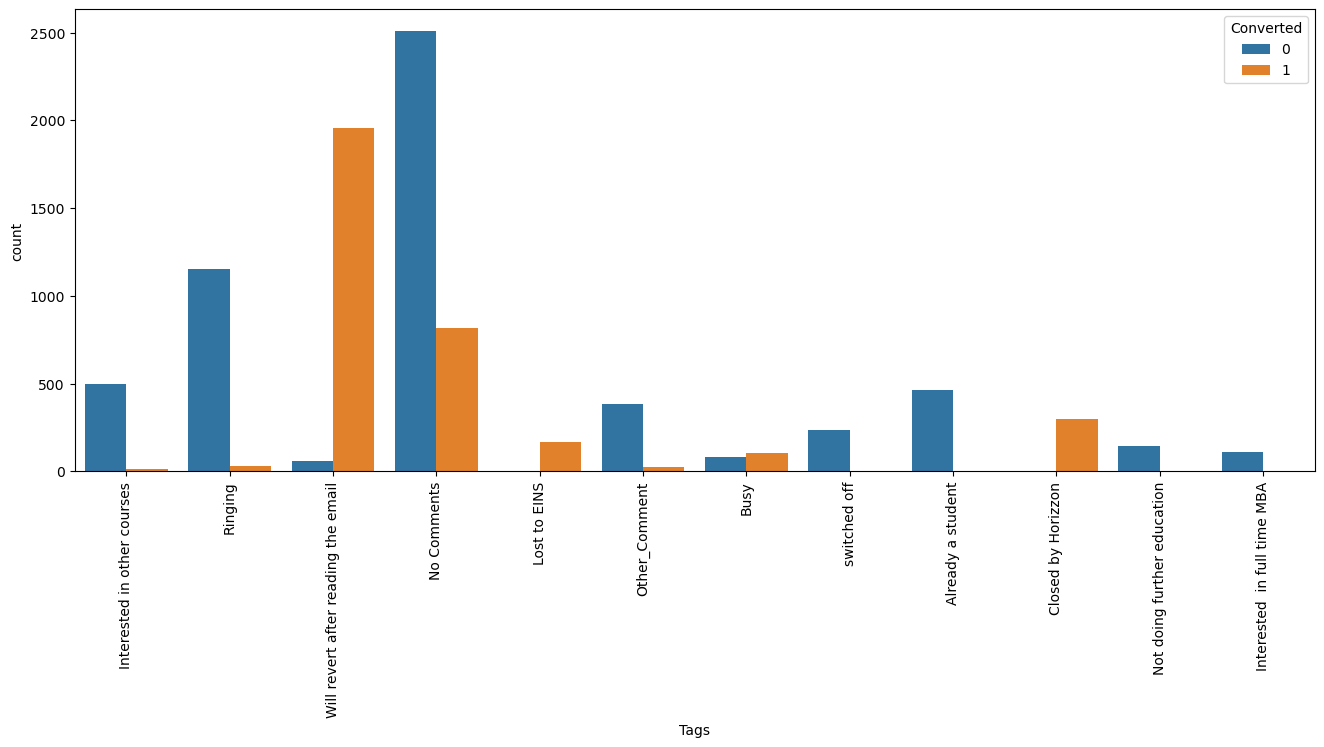

In [68]:
plt.figure(figsize=(16,6))
sns.countplot(x="Tags",data=data,hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [69]:
# Value count function to know the values:
for i in data.select_dtypes('O').columns:
    print(i)
    print()
    print(data[i].value_counts())
    print()

Lead Origin

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email

No     8358
Yes     716
Name: Do Not Email, dtype: int64

Do Not Call

No     9072
Yes       2
Name: Do Not Call, dtype: int64

Last Activity

Email Opened                    3432
SMS Sent                        2716
Ola

In [70]:
# Dropping the columns which have no say : 
data = data.drop(['Country','What matters most to you in choosing a course','I agree to pay the amount through cheque',
                 'Get updates on DM Content','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                  'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content'], axis = 1)

data.shape

(9074, 15)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [72]:
# Map function to convert Yes : 1 and No : 0
data['Do Not Email'] = data['Do Not Email'].map({'Yes':1,'No':0})
data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

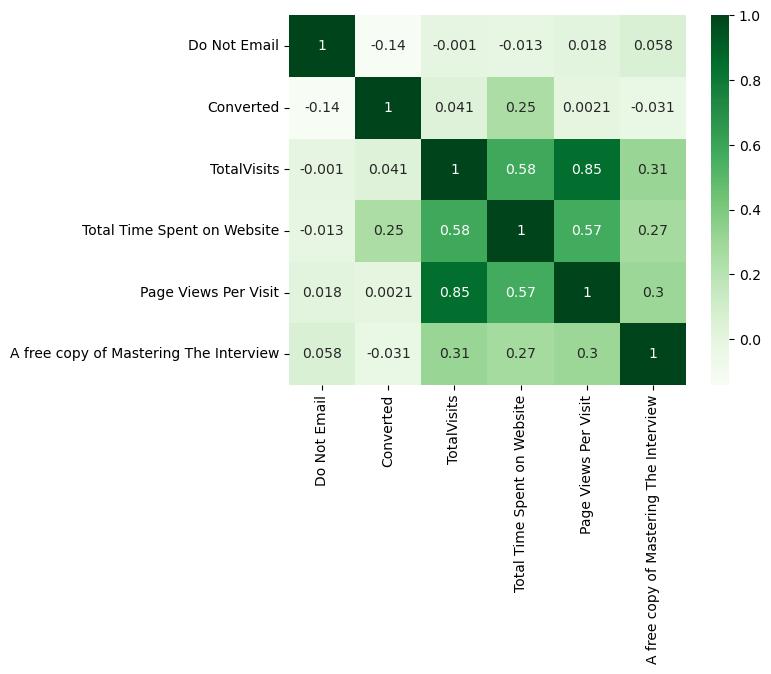

In [77]:
# HeatMap Corelation
corr_matrix=data.corr(method="spearman")
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.show()

# Model Building

In [106]:
# One_Hot_Encoding
df = data.copy()
df = pd.get_dummies(df,columns=["Lead Origin","Lead Source","Last Activity","Specialization",
                              "What is your current occupation","Tags","Lead Quality","City",
                              "Last Notable Activity"], drop_first=True, dtype='float')

In [107]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1532,2.0,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1.0,305,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,2.0,1428,1.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df.shape

(9074, 103)

In [109]:
df = df.drop(index=0)

In [110]:
# Splitting the dataset into Dependent And Independent
X = df.drop(['Converted'], axis = 1)
y = df['Converted']

In [111]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [112]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.003984,0.134243,0.018182,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.007968,0.628521,0.018182,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# OLS Approach

In [113]:
 import statsmodels.api as sm

In [114]:
x1 = sm.add_constant(X)
x1.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,1.0,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,0.003984,0.134243,0.018182,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,0.007968,0.628521,0.018182,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [116]:
log_model = sm.GLM(y_train,x_train,family=sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7157
Model Family:                Binomial   Df Model:                          100
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1184.6
Date:                Mon, 04 Dec 2023   Deviance:                       2369.2
Time:                        17:03:37   Pearson chi2:                 1.72e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6320
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.4028   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.2531      0.306     -4.096      0.000      -1.853      -0.654
TotalVisits                                              5.4651      1.760      3.104      0.002       2.015       8.916
Total Time Spent on Website                              4.6196      0.265     17.444      0.000       4.101       5.139
Page Views Per Visit                                    -1.1588      1.884     -0.615      0.538      -4.851       2.534
A free copy of Mastering The Interview                  -0.1702      0.180     -0.943      0.345      -0.524       0.183
Lead Origin_Landing Page Submission                     -0.4902      0.233     -2.104      0.035      -0.947      -0.033
Lead Origin_Lead Add Form                               -3.5468      3.333     -1.064      0.287     -10.079       2.985
Lead Origin_Lead Import                                 25.1893   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                              -4.7170      4.319     -1.092      0.275     -13.182       3.748
Lead Source_Facebook                                   -30.1281   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                      -4.6871      4.316     -1.086      0.277     -13.146       3.772
Lead Source_Live Chat                                   19.3933   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_NC_EDM                                      21.4652   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                  -3.7584      4.310     -0.872      0.383     -12.206       4.689
Lead Source_Organic Search                              -4.7022      4.319     -1.089      0.276     -13.167       3.762
Lead Source_Pay per Click Ads                          -23.0762   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Press_Release                              -24.6233   8.06e+04     -0.000      1.000   -1.58e+05    1.58e+05
Lead Source_Reference                                   -0.3235      2.761     -0.117      0.907      -5.735       5.088
Lead Source_Referral Sites                              -4.7693      4.335     -1.100      0.271     -13.265       3.726
Lead Source_Social Media                                -2.5176      7.033     -0.358      0.720     -16.302      11.267
Lead Source_WeLearn                                     15.4175   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                             3

In [117]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [118]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [119]:
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [120]:
rfe.support_

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False])

In [121]:
col = x_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No Comments',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

# Get the probability score

In [122]:
x_train_sm=sm.add_constant(x_train[col])
log_model2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result=log_model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.9
Date:                Mon, 04 Dec 2023   Deviance:                       2543.8
Time:                        17:03:56   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6230
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8656      0.202    -19.176      0.000      -4.261      -3.470
Total Time Spent on Website                       3.7473      0.219     17.136      0.000       3.319       4.176
Lead Origin_Lead Add Form                         0.9441      0.401      2.353      0.019       0.158       1.730
Lead Source_Welingak Website                      3.1297      1.095      2.857      0.004       0.983       5.276
Last Activity_SMS Sent                            2.0618      0.118     17.463      0.000       1.830       2.293
What is your current occupation_Other            -2.5539      0.146    -17.533      0.000      -2.839      -2.268
Tags_Busy                                         2.1787      0.272      8.000      0.000       1.645       2.712
Tags_Closed by Horizzon                           8.6540      0.757     11.429      0.000       7.170      10.138
Tags_Lost to EINS                                 9.1914      0.673     13.653      0.000       7.872      10.511
Tags_No Comments                                  3.4862      0.218     16.026      0.000       3.060       3.913
Tags_Ringing                                     -1.6386      0.266     -6.149      0.000      -2.161      -1.116
Tags_Will revert after reading the email          6.1511      0.242     25.367      0.000       5.676       6.626
Tags_switched off                                -2.4615      0.623     -3.954      0.000      -3.682      -1.241
Lead Quality_Worst                               -2.8323      0.752     -3.765      0.000      -4.307      -1.358
Last Notable Activity_Modified                   -1.5632      0.124    -12.575      0.000      -1.807      -1.320
Last Notable Activity_Olark Chat Conversation    -1.4952      0.416     -3.591      0.000      -2.311      -0.679
=================================================================================================================
"""

In [123]:
y_train_predict = result.predict(x_train_sm)
y_train_predict

1298    0.004369
3866    0.011025
3153    0.012324
8575    0.011864
7887    0.994740
          ...   
5851    0.011025
5302    0.011025
5502    0.988841
898     0.001116
7414    0.000258
Length: 7258, dtype: float64

In [124]:
# Another approach - fitting the LOGISTIC MODEL directly

In [125]:
logreg.fit(x_train_sm,y_train)

LogisticRegression()

In [126]:
probability_score = logreg.predict_proba(x_train_sm)
probability_score

array([[0.9909312 , 0.0090688 ],
       [0.98474594, 0.01525406],
       [0.96253154, 0.03746846],
       ...,
       [0.01531952, 0.98468048],
       [0.99826185, 0.00173815],
       [0.9988172 , 0.0011828 ]])

In [127]:
pos_prob_score = logreg.predict_proba(x_train_sm)[:,1]
pos_prob_score

array([0.0090688 , 0.01525406, 0.03746846, ..., 0.98468048, 0.00173815,
       0.0011828 ])

In [128]:
# Continuing with first approach
# Create a dataframe for y_train_predict

In [129]:
y_train_predict_final = pd.DataFrame({'Converted':y_train.values,"Probability":y_train_predict})
y_train_predict_final['Customer ID'] = y_train.index
y_train_predict_final.head()

,Converted,Probability,Customer ID
1298,0,0.004369,1298
3866,0,0.011025,3866
3153,0,0.012324,3153
8575,0,0.011864,8575
7887,1,0.994740,7887


# ROC, Threshold value

In [131]:
from sklearn.metrics import roc_curve,precision_recall_curve, f1_score, auc

In [132]:
fpr, tpr, thresholds_roc = roc_curve(y_train_predict_final['Converted'],y_train_predict_final['Probability'])

In [133]:
precision,recall,threshold_pr = precision_recall_curve(y_train_predict_final['Converted'],y_train_predict_final['Probability'])

In [134]:
# plot the roc_curve

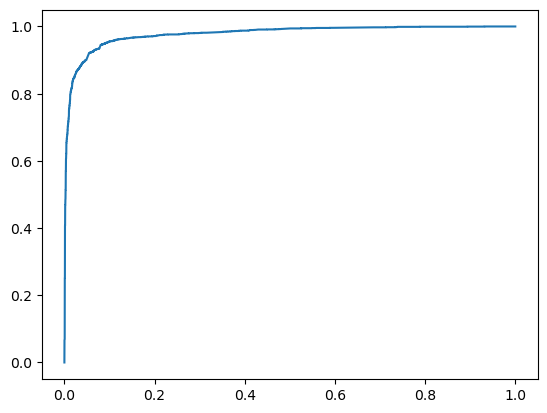

In [135]:
plt.plot(fpr,tpr,label="ROC Curve(area=%0.2f)"% auc(fpr,tpr))
plt.show()

In [136]:
# Find the threshold value 
f1_scores=2*(precision*recall)/(precision+recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=threshold_pr[optimal_idx]

optimal_threshold

0.4033462153843123

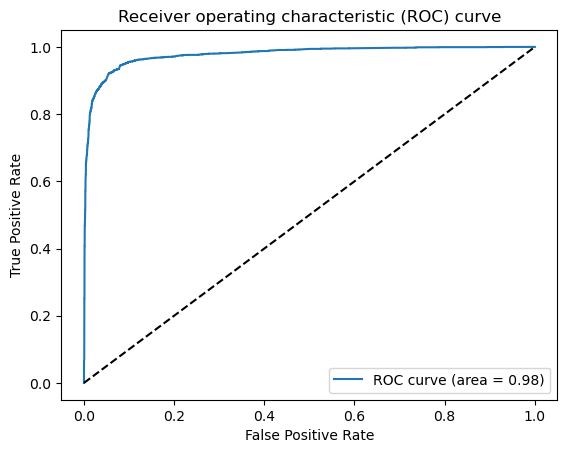

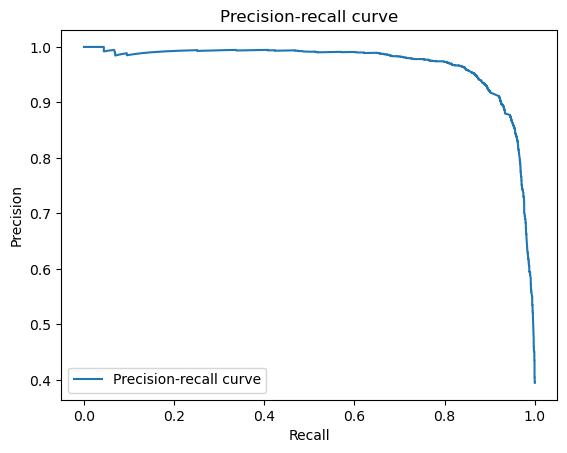

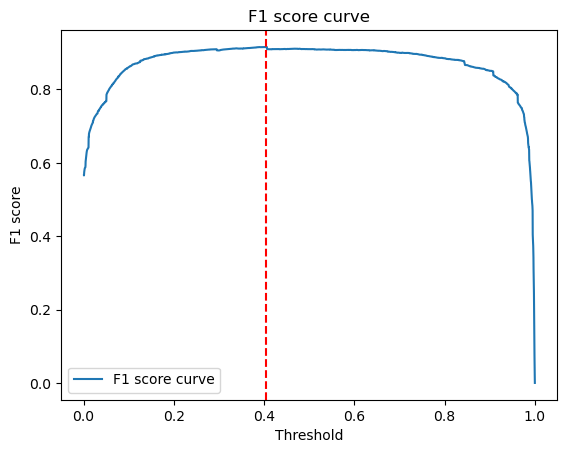

In [138]:
# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
#plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plot F1 score curve
plt.plot(threshold_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

In [139]:
# Final Prediction for Converted as per the threshold value i.e. 0.40

In [140]:
y_train_predict_final['Final_Prediction'] = y_train_predict_final['Probability'].map(lambda x:1 if x>0.4 else 0)

In [141]:
y_train_predict_final.head()

,Converted,Probability,Customer ID,Final_Prediction
1298,0,0.004369,1298,0
3866,0,0.011025,3866,0
3153,0,0.012324,3153,0
8575,0,0.011864,8575,0
7887,1,0.994740,7887,1


In [142]:
# Seperating the clients in Hot, Cold, Potential Client

In [143]:
def decide_case(prob, hot = 0.70, cold = 0.30):
    if prob >= hot:
        return "Most Imp"
    elif prob< cold:
        return "Cold Case"
    else:
        return "Potential Client"

In [145]:
y_train_predict_final["Case"] = y_train_predict_final['Probability'].apply(decide_case)
y_train_predict_final.head(10)

,Converted,Probability,Customer ID,Final_Prediction,Case
1298,0,0.004369,1298,0,Cold Case
3866,0,0.011025,3866,0,Cold Case
3153,0,0.012324,3153,0,Cold Case
8575,0,0.011864,8575,0,Cold Case
7887,1,0.994740,7887,1,Most Imp
1703,0,0.053539,1703,0,Cold Case
7775,0,0.000258,7775,0,Cold Case
7357,0,0.000892,7357,0,Cold Case
608,0,0.080403,608,0,Cold Case
6941,0,0.001387,6941,0,Cold Case


In [150]:
y1 = y_train_predict_final[y_train_predict_final['Case']=='Potential Client']

In [151]:
# To check the potential clients
y1

,Converted,Probability,Customer ID,Final_Prediction,Case
8143,0,0.380515,8143,0,Potential Client
5478,0,0.462941,5478,1,Potential Client
8562,1,0.657415,8562,1,Potential Client
7176,1,0.481703,7176,1,Potential Client
2963,1,0.452297,2963,1,Potential Client
...,...,...,...,...,...
6877,0,0.411400,6877,1,Potential Client
2092,0,0.379373,2092,0,Potential Client
8150,1,0.348186,8150,0,Potential Client
3938,0,0.406267,3938,1,Potential Client


In [152]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [153]:
confusion_matrix(y_train_predict_final['Converted'],y_train_predict_final['Final_Prediction'])

array([[4267,  248],
       [ 217, 2526]], dtype=int64)

In [158]:
print(classification_report(y_train_predict_final['Converted'],y_train_predict_final['Final_Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4515
           1       0.91      0.92      0.92      2743

    accuracy                           0.94      7258
   macro avg       0.93      0.93      0.93      7258
weighted avg       0.94      0.94      0.94      7258



In [159]:
print(accuracy_score(y_train_predict_final['Converted'],y_train_predict_final['Final_Prediction']))

0.9359327638467897


# Doing the same steps with the x_test data

In [160]:
x_test_sm=sm.add_constant(x_test[col])  # add the constant

In [170]:
x_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Comments,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
466,1.0,0.117518,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3044,1.0,0.398768,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5121,1.0,0.016725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5757,1.0,0.850792,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5394,1.0,0.072183,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [161]:
y_test_predict = result.predict(x_test_sm)

In [162]:
# Creating the DataFrame
y_test_predict_final2 = pd.DataFrame({'Converted':y_test.values,"Probability":y_test_predict})
y_test_predict_final2['Customer ID'] = y_test.index
y_test_predict_final2.head()

,Converted,Probability,Customer ID
466,1,0.961748,466
3044,1,0.997104,3044
5121,0,0.021819,5121
5757,1,0.910249,5757
5394,0,0.014400,5394


In [ ]:
# Final Prediction for Converted as per the threshold value i.e. 0.40

In [163]:
y_test_predict_final2['Final_Prediction'] = y_test_predict_final2['Probability'].map(lambda x:1 if x>0.4 else 0)

In [164]:
y_test_predict_final2.head()

,Converted,Probability,Customer ID,Final_Prediction
466,1,0.961748,466,1
3044,1,0.997104,3044,1
5121,0,0.021819,5121,0
5757,1,0.910249,5757,1
5394,0,0.014400,5394,0


In [ ]:
# Seperating the clients in Hot, Cold, Potential Client

In [165]:
def decide_case(prob, hot = 0.70, cold = 0.30):
    if prob >= hot:
        return "Most Imp"
    elif prob< cold:
        return "Cold Case"
    else:
        return "Potential Client"

In [166]:
y_test_predict_final2["Case"] = y_test_predict_final2['Probability'].apply(decide_case)
y_test_predict_final2.head(10)

,Converted,Probability,Customer ID,Final_Prediction,Case
466,1,0.961748,466,1,Most Imp
3044,1,0.997104,3044,1,Most Imp
5121,0,0.021819,5121,0,Cold Case
5757,1,0.910249,5757,1,Most Imp
5394,0,0.014400,5394,0,Cold Case
4968,1,0.997643,4968,1,Most Imp
2315,1,0.987225,2315,1,Most Imp
7041,0,0.592659,7041,1,Potential Client
3994,0,0.020964,3994,0,Cold Case
4349,1,0.952932,4349,1,Most Imp


In [167]:
confusion_matrix(y_test_predict_final2['Converted'],y_test_predict_final2['Final_Prediction'])

array([[1054,   69],
       [  54,  638]], dtype=int64)

In [168]:
print(classification_report(y_test_predict_final2['Converted'],y_test_predict_final2['Final_Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1123
           1       0.90      0.92      0.91       692

    accuracy                           0.93      1815
   macro avg       0.93      0.93      0.93      1815
weighted avg       0.93      0.93      0.93      1815



In [169]:
print(accuracy_score(y_test_predict_final2['Converted'],y_test_predict_final2['Final_Prediction']))

0.9322314049586777
